<a href="https://colab.research.google.com/github/UrielMendoza/Curso-RV-python/blob/master/Viernes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cartopy

Cartopy es un paquete de Python diseñado para el procesamiento de datos geoespaciales con el fin de producir mapas y otros análisis de datos geoespaciales.

Instalación 

**Proyecciones**


PlateCarree (Equirrectangular)

Mercator

Robinson

UTM

CCL

Geoestacionario

Graficacion 

Extención

Geopandas y Cartopy

Apertura y reproyeccion

Graficacion conjunta

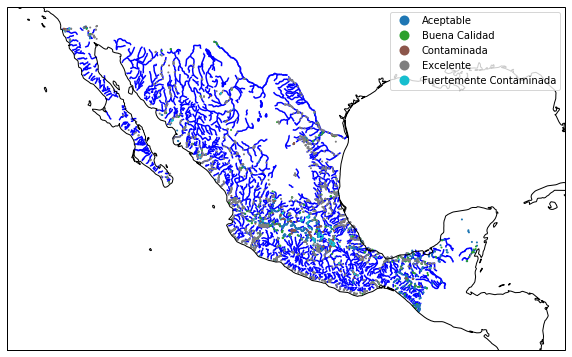

In [222]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines(resolution='50m')
ax.set_extent([-121,-82, 12, 34], crs=ccrs.PlateCarree())
agua.plot(ax=ax, markersize=1,zorder=1,column='dbo_clas',legend=True)
rios.plot(ax=ax, markersize=1,zorder=0,color='b',legend=True)


Extent

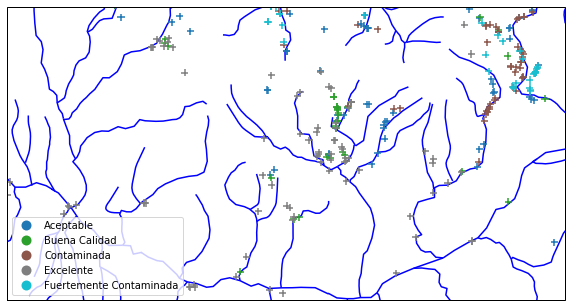

In [223]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines(resolution='50m')
ax.set_extent([-101,-98,18,19.5], crs=ccrs.PlateCarree())
agua.plot(ax=ax, marker= '+', markersize=50,zorder=1,column='dbo_clas',legend=True)
rios.plot(ax=ax, markersize=1,zorder=0,color='b',legend=True)

Municipios

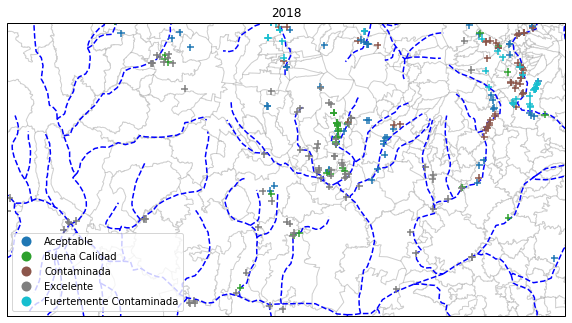

In [224]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines(resolution='50m')
ax.set_extent([-101,-98,18,19.5], crs=ccrs.PlateCarree())
agua.plot(ax=ax, marker= '+', markersize=50,zorder=2,column='dbo_clas',legend=True)
rios.plot(ax=ax, linestyle='--',markersize=1,zorder=1,color='b',legend=True)
muni.plot(ax=ax,alpha=0.1,color='white',edgecolor='black',zorder=0)
plt.title('2018')
plt.savefig('mapa.png',bbox_inches='tight', pad_inches=0)

**Geoprocesamiento**

Diferencia


```
from geopandas.tools import overlay
symDif= gpd.overlay(riosb,aguab, how='symetricalDifference)
```



Area

Graficacion

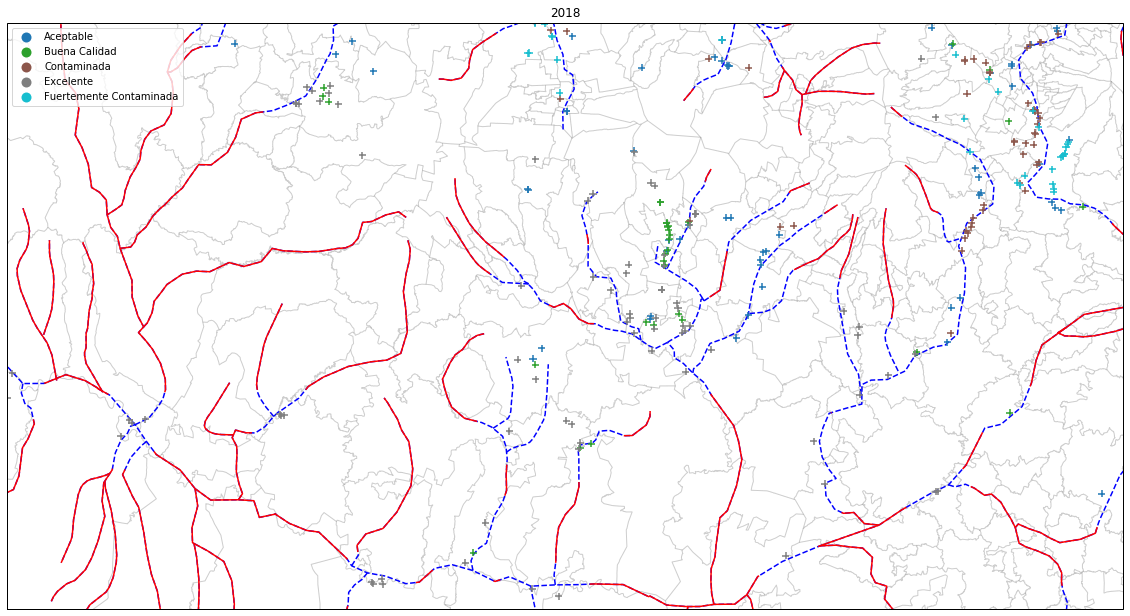

In [225]:
plt.figure(figsize=(20,20))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines(resolution='50m')
ax.set_extent([-101,-98,18,19.5], crs=ccrs.PlateCarree())
agua.plot(ax=ax, marker= '+', markersize=50,zorder=2,column='dbo_clas',legend=True)
rios.plot(ax=ax, linestyle='--',markersize=0.5,zorder=1,color='b',legend=True)
muni.plot(ax=ax,alpha=0.1,color='white',edgecolor='black',zorder=0)
dif.plot(ax=ax,color = 'red',legend = True)
plt.title('2018')
plt.savefig('mapa.png',bbox_inches='tight', pad_inches=0)

Escritura de archivo

# Introducción a automatización 

Conjunto de archivos

Automatización temporal

**Conjunto de archivos**

Modulo OS

El módulo os nos permite acceder a funcionalidades dependientes del Sistema Operativo. Sobre todo, aquellas que nos refieren información sobre el entorno del mismo y nos permiten manipular la estructura de directorios (para leer y escribir archivos.

Importacion

listdir

Modulo GLOB

El módulo glob encuentra todas las rutas que concuerdan con un patrón específico, según las normas de la shell de Unix.

Importacion

glob

Cambiar proyeccion y formato(csv)

### Funciones

# **Ejercicio de aplicacion**

Realizar el mapa de zonas de no monitoreo para 2006-2018, con el uso de funciones y automatizacion

In [226]:
import geopandas as gpd

agua = gpd.read_file('/content/drive/My Drive/Curso-RV-python/EMCA_DBO_2018/EMCA_DBO5_2018.shp')
agua = agua.to_crs({'init':'epsg:3857'})
rios = gpd.read_file('/content/drive/My Drive/Curso-RV-python/hidro4mgw_c/hidro4mcw.shp')
rios = rios.to_crs({'init':'epsg:3857'})
muni = gpd.read_file('/content/drive/My Drive/Curso-RV-python/muni_2018gw/muni_2018gw.shp')
muni = muni.to_crs({'init':'epsg:3857'})


/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [0]:

from shapely import ops

riosb = rios.buffer(500)
aguab = agua.buffer(10000)
aguab = ops.unary_union(aguab)

dif = rios.difference(aguab)

AttributeError: ignored

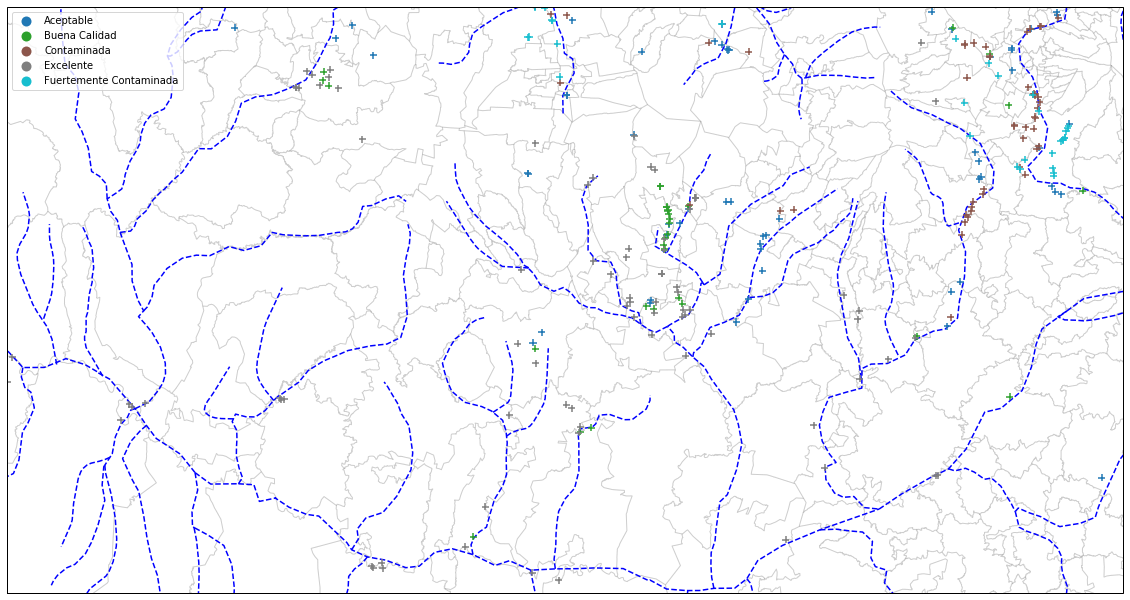

In [228]:
plt.figure(figsize=(20,20))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines(resolution='50m')
ax.set_extent([-101,-98,18,19.5], crs=ccrs.PlateCarree())
agua.plot(ax=ax, marker= '+', markersize=50,zorder=2,column='dbo_clas',legend=True)
rios.plot(ax=ax, linestyle='--',markersize=0.5,zorder=1,color='b',legend=True)
muni.plot(ax=ax,alpha=0.1,color='white',edgecolor='black',zorder=0)
dif.plot(ax=ax,color = 'red',legend = True)
plt.title('2018')
plt.savefig('mapa.png',bbox_inches='tight', pad_inches=0)


In [0]:
from glob import glob

archivos = glob('/content/drive/My Drive/Curso-RV-python/datos/*/*.shp')
archivos.sort()

for i in archivos:  
  nombre = i.split('/')[-1].split('.')[0]
  anio = i.split('/')[-1].split('.')[0][-4:]
  print('Procesando:',nombre,anio)
  df = gpd.read_file(i)
  df = df.to_crs({'init':'epsg:3857'})
  df.to_csv(nombre+'.csv')
print('Finalizado')

Funcion 1

Funcion 2

Funcion 3 

Funcion 4 (Funcion Integradora)

Programa final (Script principal)

**Automatización temporal**

CRONTAB (LINUX) 

**5 4 * * * python3 script.py**

task scheduler (WINDOWS)

Introducción a aplicaciones WEB con python (Django y FLASK)



```
from flask import Flask,request,render_template,url_for
from programa import integra

app = Flask(__name__)

@app.route('/',methods=["GET", "POST"])
def menu():
    mapa = 'latest.png'
    if request.method == 'POST':

        lon = request.form['lon']
        lat = request.form['lat']
        anio = request.form['anio']

        ruta = 'datos/*/*.shp'
        cuandrante = [lon-1,lon+1,lat-1,lat+1]

        path = 'static/'

        mapa = integra(ruta,cuandrante,anio)

    return render_template('index.html',image = mapa)

if __name__ == "__main__":
    app.run(host = '132.247.103.145',port=5000)
```

